# Using Scikit-Learn Neural Network Class to classify MNIST


# About

Yann LeCun's MNIST is the most "used" dataset in Machine Learning I believe, lot's ML/DL practitioner will use it as the "Hello World" problem in Machine Learning, it's old, but golden, Even [Geoffrey Hinton's Capsule Network](https://en.wikipedia.org/wiki/Capsule_neural_network) also using MNIST as testing.

Most the tutorial online will guide the learner to use TensorFlow or Keras or PyTorch library to tackle MNIST problem, but actually it's not necessary， there's multiple solution for a single problem, we can tackle MNIST problem by "Pure" Python code, crafting the algorithm from scratch, or using the convential Machine Learning Library [Scikit-Learn](https://scikit-learn.org/stable/) `MLPClassifier`

In [33]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [34]:
# load the data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X.values, y.values

# use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's visualize MNIST first

the label of the first data image:5
first data image:


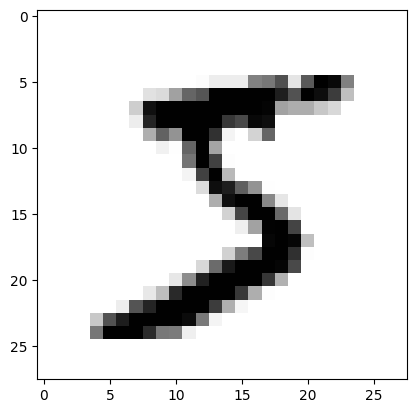

In [35]:
print(f'the label of the first data image:{y[0]}')
print(f'first data image:')
plt.imshow(X[0].reshape(28,28), cmap=plt.cm.gray_r)

Next we going to bulid a single hidden layer MLP model

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)# solver here is equal to the optimizer

In [37]:
# start the training
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)#use the method "fit" to start the training

Iteration 1, loss = 88770.42594147
Iteration 2, loss = 94144.72785948
Iteration 3, loss = 94116.48942606
Iteration 4, loss = 94088.25915097
Iteration 5, loss = 94060.03773325
Iteration 6, loss = 94031.82434269
Iteration 7, loss = 94003.61939577
Iteration 8, loss = 93975.42334401
Iteration 9, loss = 93947.23547037
Iteration 10, loss = 93919.05614157


Obviously the loss is abnormal, is because we didn't scale the data.(This process is called Normalization.More details here https://zhuanlan.zhihu.com/p/33173246(Chinese) or https://medium.com/nerd-for-tech/overview-of-normalization-techniques-in-deep-learning-e12a79060daf(English))

In [38]:
X = X / 255.

In [39]:
# use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [40]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


In [41]:
print(f"Training set score: {mlp.score(X_train, y_train):.3f}")
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")

Training set score: 0.987
Test set score: 0.970


Now let's visualize our predicted results and the groundtruth

the correct case:
the label of the data image:7
the predict of the data image:7
the data image:


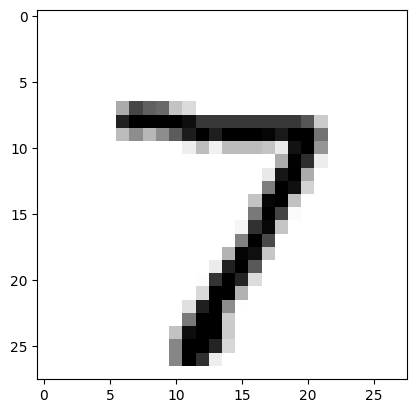

In [42]:
compare = (y_test==mlp.predict(X_test))
correct_index = np.where(compare==True)
incorrect_index = np.where(compare==False)
# the correct case
print(f'the correct case:')
print(f'the label of the data image:{y_test[correct_index[0][0]]}')
print(f'the predict of the data image:{mlp.predict(X_test)[correct_index[0][0]]}')
print(f'the data image:')
plt.imshow(X_test[correct_index[0][0]].reshape(28,28), cmap=plt.cm.gray_r)


the incorrect case:
the label of the data image:8
the predict of the data image:2
the data image:


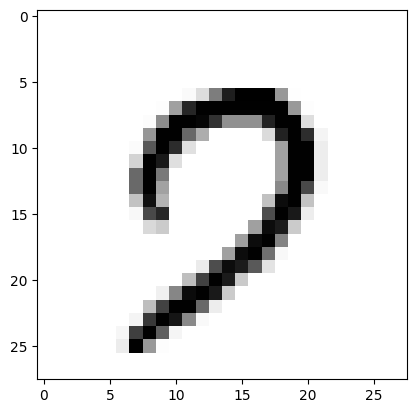

In [45]:
# the incorrect case
print(f'the incorrect case:')
print(f'the label of the data image:{y_test[incorrect_index[0][0]]}')
print(f'the predict of the data image:{mlp.predict(X_test)[incorrect_index[0][0]]}')
print(f'the data image:')
plt.imshow(X_test[incorrect_index[0][20]].reshape(28,28), cmap=plt.cm.gray_r)